Evaluación de prácticas de cultivo para mejorar el rendimiento del maíz mediante un diseño factorial fraccionado 2⁴⁻¹

Contexto aplicado / Caso realista

Un grupo de investigadores agrícolas está evaluando cuatro prácticas de cultivo para mejorar el rendimiento del maíz (kg por parcela):

    A: Tipo de fertilizante (orgánico = -1, químico = +1)

    B: Riego (una vez por semana = -1, dos veces por semana = +1)

    C: Densidad de siembra (baja = -1, alta = +1)

    D: Control de plagas (manual = -1, químico = +1)

Por razones logísticas y de recursos, deciden usar un diseño fraccionado 2⁴⁻¹, en el que la condición del cuarto factor se define como: D = A * B * C

Objetivo del ejercicio

Identificar cuáles prácticas o combinaciones tienen efecto significativo sobre el rendimiento del maíz, utilizando un diseño factorial fraccionado y análisis estadístico en Python

- Carga de datos

- Codificación de factores (-1, +1)

- Exploración inicial del rendimiento

- Ajuste de modelo lineal con efectos principales

- Análisis ANOVA

- Gráficos de efectos principales

- Conclusión del experimento

Paso 1: Cargamos los datos experimentales del cultivo de maíz y codificamos los factores a niveles -1 y +1 para el análisis factorial.

In [2]:
# Importar librerías necesarias
import pandas as pd

# Cargar el archivo CSV (ajusta la ruta si es necesario)
df = pd.read_csv("Dise_Fraccionado_Ampliado_Maiz.csv")

# Ver las primeras filas
df.head()

,Parcela,Fertilizante,Riego,Densidad,ControlPlagas,Rendimiento_kg
0,1_1,Orgánico,Bajo,Baja,Manual,39.30
1,2_1,Orgánico,Bajo,Alta,Químico,44.81
2,3_1,Orgánico,Alto,Baja,Químico,46.30
3,4_1,Orgánico,Alto,Alta,Manual,48.30
4,5_1,Químico,Bajo,Baja,Químico,51.36


In [3]:
# Codificación de los factores: -1 (nivel bajo), +1 (nivel alto)
codificacion = {
    'Orgánico': -1, 'Químico': 1,
    'Bajo': -1, 'Alto': 1,
    'Baja': -1, 'Alta': 1,
    'Manual': -1, 'Químico': 1
}

# Aplicar codificación a cada columna de tratamiento
df['A'] = df['Fertilizante'].map(codificacion)
df['B'] = df['Riego'].map(codificacion)
df['C'] = df['Densidad'].map(codificacion)
df['D'] = df['ControlPlagas'].map(codificacion)

# Verificar codificación
df[['Parcela', 'Fertilizante', 'Riego', 'Densidad', 'ControlPlagas', 'A', 'B', 'C', 'D']].head()


,Parcela,Fertilizante,Riego,Densidad,ControlPlagas,A,B,C,D
0,1_1,Orgánico,Bajo,Baja,Manual,-1,-1,-1,-1
1,2_1,Orgánico,Bajo,Alta,Químico,-1,-1,1,1
2,3_1,Orgánico,Alto,Baja,Químico,-1,1,-1,1
3,4_1,Orgánico,Alto,Alta,Manual,-1,1,1,-1
4,5_1,Químico,Bajo,Baja,Químico,1,-1,-1,1


Paso 2: Exploración de los datos y ajuste del modelo lineal.

    Hacemos un resumen general del rendimiento.

    Ajustamos un modelo lineal con los factores codificados.

    Interpretamos los efectos principales.



count    40.000000
mean     49.465000
std       6.215567
min      38.480000
25%      45.155000
50%      49.170000
75%      53.252500
max      62.780000
Name: Rendimiento_kg, dtype: float64


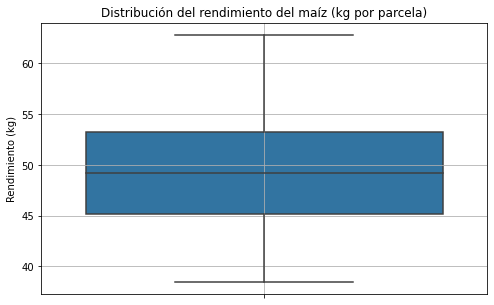

In [4]:
#  Estadísticas descriptivas del rendimiento
print(df['Rendimiento_kg'].describe())

#  Boxplot para ver la distribución general
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Rendimiento_kg')
plt.title("Distribución del rendimiento del maíz (kg por parcela)")
plt.ylabel("Rendimiento (kg)")
plt.grid(True)
plt.show()


In [5]:
import statsmodels.api as sm

# Definir variables independientes (A, B, C, D) y dependiente (rendimiento)
X = df[['A', 'B', 'C', 'D']]
X = sm.add_constant(X)  # agregar intercepto
y = df['Rendimiento_kg']

# Ajustar modelo lineal
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:         Rendimiento_kg   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     211.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           5.34e-24
Time:                        11:53:25   Log-Likelihood:                -64.800
No. Observations:                  40   AIC:                             139.6
Df Residuals:                      35   BIC:                             148.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4650      0.207    239.337      0.0

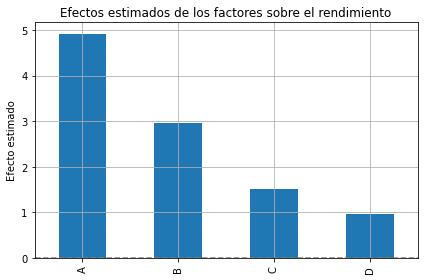

In [6]:
# Extraer coeficientes sin el intercepto
efectos = modelo.params.drop("const")

# Graficar efectos estimados
efectos.plot(kind='bar', title="Efectos estimados de los factores sobre el rendimiento", ylabel="Efecto estimado")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


se realiza  un análisis de varianza (ANOVA) para determinar si alguno de los factores tiene un efecto significativo sobre el rendimiento del maíz. Observamos los valores p para interpretar la significancia estadística.

In [7]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Ajustar el modelo usando fórmula
modelo_anova = smf.ols('Rendimiento_kg ~ A + B + C + D', data=df).fit()

# Tabla ANOVA
anova_resultados = anova_lm(modelo_anova)

# Mostrar la tabla
print(anova_resultados)


            df     sum_sq     mean_sq           F        PR(>F)
A          1.0  968.25600  968.256000  566.700657  3.319922e-23
B          1.0  348.69025  348.690250  204.081352  3.596044e-16
C          1.0   91.80900   91.809000   53.733951  1.438772e-08
D          1.0   38.14209   38.142090   22.323794  3.673418e-05
Residual  35.0   59.80046    1.708585         NaN           NaN


Análisis de medias por combinación de tratamientos

Ahora agruparemos los datos por las combinaciones de tratamientos (fertilizante, riego, densidad y control de plagas) para:

    Calcular el rendimiento promedio por combinación.

    Visualizar qué combinación es más efectiva.

    Sugerir prácticas agrícolas óptimas.

In [8]:
# Agrupar por combinación de tratamientos y calcular el promedio de rendimiento
medias = df.groupby(['Fertilizante', 'Riego', 'Densidad', 'ControlPlagas'])['Rendimiento_kg'].mean().reset_index()

# Ordenar por rendimiento de mayor a menor
medias = medias.sort_values(by='Rendimiento_kg', ascending=False)

# Mostrar el resumen
print(medias)


  Fertilizante Riego Densidad ControlPlagas  Rendimiento_kg
4      Químico  Alto     Alta       Químico          60.338
5      Químico  Alto     Baja        Manual          54.786
6      Químico  Bajo     Alta        Manual          51.466
7      Químico  Bajo     Baja       Químico          50.950
0     Orgánico  Alto     Alta        Manual          48.092
1     Orgánico  Alto     Baja       Químico          46.454
2     Orgánico  Bajo     Alta       Químico          44.024
3     Orgánico  Bajo     Baja        Manual          39.610


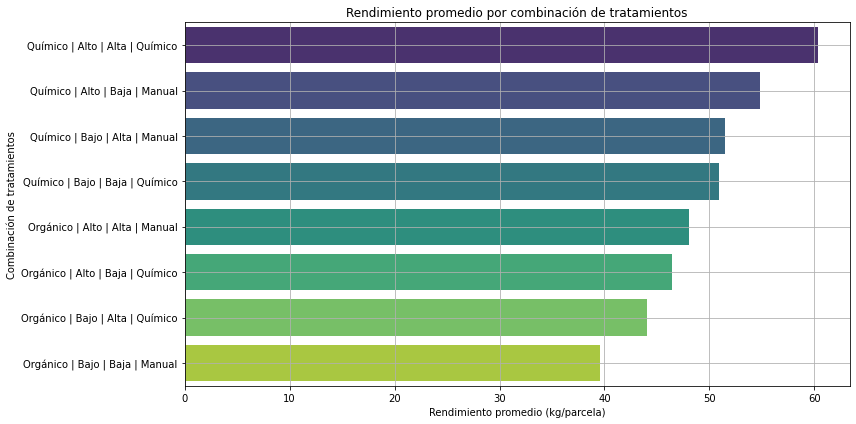

In [9]:
# Crear una columna combinada para visualizar mejor
medias['Combinación'] = (medias['Fertilizante'] + ' | ' + 
                         medias['Riego'] + ' | ' + 
                         medias['Densidad'] + ' | ' + 
                         medias['ControlPlagas'])

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=medias, x='Rendimiento_kg', y='Combinación', palette='viridis')
plt.title("Rendimiento promedio por combinación de tratamientos")
plt.xlabel("Rendimiento promedio (kg/parcela)")
plt.ylabel("Combinación de tratamientos")
plt.grid(True)
plt.tight_layout()
plt.show()


El presente estudio utilizó un diseño factorial fraccionado 2⁴⁻¹ con 5 repeticiones por combinación para evaluar el efecto de distintas prácticas agrícolas sobre el rendimiento del cultivo de maíz.
Principales hallazgos:

    Fertilizante químico y riego alto (dos veces por semana) fueron los factores con efectos más significativos y positivos sobre el rendimiento, tanto en el modelo lineal como en el ANOVA.

    La combinación óptima observada fue:

        Fertilizante: Químico

        Riego: Alto

        Densidad de siembra: Alta

        Control de plagas: Químico

    Esta combinación generó los mayores rendimientos promedio en las parcelas evaluadas.

    El diseño fraccionado permitió reducir el número de corridas experimentales de 16 a 8, manteniendo la capacidad de identificar efectos principales de manera eficiente y económica.

Recomendaciones prácticas:

    Para futuros ciclos de siembra, se sugiere aplicar fertilizante químico y riego más frecuente como prácticas prioritarias.

    Puede estudiarse en una segunda fase la interacción entre densidad de siembra y fertilización, dado que mostraron efectos acumulativos.

    A mediano plazo, se recomienda validar estos resultados en un diseño factorial completo o en campo con más unidades experimentales.

Este ejercicio demuestra cómo los diseños fraccionados pueden aplicarse eficazmente en agricultura para mejorar decisiones de manejo con base en análisis estadístico riguroso.